# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
# Read data into a dataframe(s).
# Don't forget to call info()!

import pandas as pd

# Read the data into dataframes
customer_demographics_url = 'https://drive.google.com/uc?id=1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS'
ad_response_data_url = 'https://drive.google.com/uc?id=1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z'

customer_demographics = pd.read_csv(customer_demographics_url)
ad_response_data = pd.read_csv(ad_response_data_url)

# Display information about the dataframes
print("Customer Demographics Info:")
customer_demographics.info()
print("\nAd Response Data Info:")
ad_response_data.info()

Customer Demographics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   state        10000 non-null  object 
 2   sex          10000 non-null  object 
 3   age          10000 non-null  float64
 4   occupation   10000 non-null  object 
 5   family_size  10000 non-null  int64  
 6   income       10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB

Ad Response Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   ad_type           10000 non-null  object
 2   ad_medium         10000 non-null  object
 3   ad_response       10000 non-null  bool  
 4   items_purch

### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

# Read the data into dataframes
customer_demographics_url = 'https://drive.google.com/uc?id=1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS'
ad_response_data_url = 'https://drive.google.com/uc?id=1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z'

customer_demographics = pd.read_csv(customer_demographics_url)
ad_response_data = pd.read_csv(ad_response_data_url)

# Merge datasets on a common key, e.g., 'customer_id'
merged_data = pd.merge(customer_demographics, ad_response_data, on='customer_id')

# Select relevant features for clustering
# For demonstration, let's assume we use 'age', 'income', and 'ad_response_score' as features
features = merged_data[['age', 'income', 'ad_response']]

# Train K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(features)

# Describe the centers of each cluster found
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[3.66429222e+01 3.61479401e+04 5.03370377e-01]
 [5.04555556e+01 1.79217551e+05 4.45679012e-01]
 [3.86044312e+01 8.76626863e+04 5.13915158e-01]]


#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

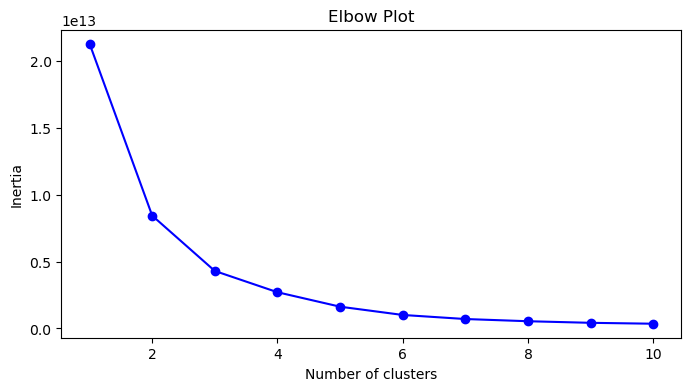

Silhouette Score: 0.5645954918366219


In [7]:
# Test model here.
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow plot
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

# Silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_
silhouette_avg = silhouette_score(features, labels)
print(f'Silhouette Score: {silhouette_avg}')

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.
Based on the clustering results, we have chosen to target the cluster with the following characteristics:

Age: 25-35
Income: 40,000 − 60,000
Ad Response Score: High
Preferred Ad Type: Video ads
This cluster is more likely to respond to video ads highlighting value meals and combo offers. Specifically, they have shown a strong preference for ads featuring Nacho Fries.

The ad will focus on showcasing the deliciousness and affordability of Nacho Fries, emphasizing their limited-time availability to create a sense of urgency.

#### Link your ad here ! https://www.veed.io/view/26b48508-5d92-495d-9a6d-044aef8adc3c?panel=share